In [46]:
# import libraries

import numpy as np
import numpy.random as rnd
from scipy.stats import binom
import matplotlib.pyplot as plt

In [28]:
# 1a. Ensemble model accuracy

n = 15
p = .63

print("The ensemble model accuracy would be:", 1 - binom.cdf(7, n, p))

The ensemble model accuracy would be: 0.8512830492077244


In [27]:
# 1b. What would the accuracy of the 15 models need to be to have 95% accuracy?

p = .63
acc = 1 - binom.cdf(7, n, p)

while acc < .95:
    acc = 1 - binom.cdf(7, n, p)
    print(p, ",", acc)
    p = p + .01
    
# I just wanted to test my loop...
#print(1 - binom.cdf(7, 15, .65))
#print(1 - binom.cdf(7, 15, .75))
#print(1 - binom.cdf(7, 15, .72))
#print(1 - binom.cdf(7, 15, .70))
#print(1 - binom.cdf(7, 15, .71))

# print answer
print("The accuracy of each of the 15 models would need to be 71% for the ensemble model to have 95% accuracy."
     "\nFor 71% accuracy in each model, the ensemble model would be 95.86%")

0.63 , 0.8512830492077244
0.64 , 0.86977992974609
0.65 , 0.8867688692244357
0.66 , 0.9022603240315147
0.67 , 0.9162806053440711
0.68 , 0.9288706251332859
0.6900000000000001 , 0.9400844153988924
0.7000000000000001 , 0.949987459946224
0.7100000000000001 , 0.9586548819437409
The accuracy of each of the 15 models would need to be 71% for the ensemble model to have 95% accuracy.
For 71% accuracy in each model, the ensemble model would be 95.86%


In [29]:
# 1c. How many models at 63% accuracy are needed for the ensemble model to have 95% accuracy?

n = 15
p = .63
minimum = (n - 1) / 2
mod_a = 1 - binom.cdf(minimum, n, p)

while mod_a < .95:
    mod_a = 1 - binom.cdf(minimum, n, p)
    print(n, ",", mod_a)
    n = n + 2
    minimum = (n - 1) / 2
    
# print answer
print('We need 39 or more models to have an esemble model with 95%, with individual models having 63% accuracy.')

15 , 0.8512830492077244
17 , 0.8658664928408661
19 , 0.8787086733042108
21 , 0.8900840199150323
23 , 0.9002082852231472
25 , 0.9092548224892133
27 , 0.9173653910919826
29 , 0.9246576033227324
31 , 0.9312302200505518
33 , 0.9371670182676638
35 , 0.9425396809647804
37 , 0.9474099996997165
39 , 0.9518315826463696
We need 39 or more models to have an esemble model with 95%, with individual models having 63% accuracy.


In [30]:
# 2. Working with Random Data
# 2a. Make a pmf

# assign probabilities for pmf
prob = np.array([1/5, 2/25, 2/5, 7/25, 1/25])

# checking to make sure my probabilities add up to 1
print(sum(prob))

1.0


In [31]:
# 2b/2c. Build a function that generates 50 random X-values from the pmf and returns means. Run this 1,000 and 
# store the means in a list

num_values = 50
np.random.choice(a = range(1, 6), size = num_values, replace = True, p = prob)

n = 1000

def new_list():
    m_list = []
    for i in range(1, n+1):
        mean = np.random.choice(a = range(1, 6), size = num_values, replace = True, p = prob).mean()
        m_list.append(mean)
    return(np.array(m_list))

m_list = new_list()

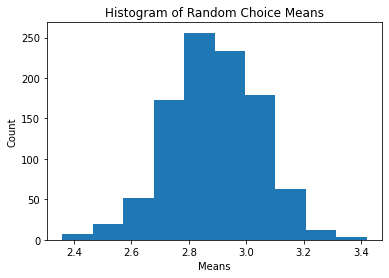

The shape of the histogram is bell shaped (like a bell curve). The Central Limit Theorem tells us this will happen.


In [80]:
# 2d. Creat a histogram of the means from part c

plt.hist(m_list)
plt.title('Histogram of Random Choice Means')
plt.xlabel('Means')
plt.ylabel('Count')

# show the plot
plt.show()

print("The shape of the histogram is bell shaped (like a bell curve). The Central Limit Theorem tells us this will happen.")

In [82]:
# 2e. Mean and standard deviation of the list of means

print("The mean of the means list is:", m_list.mean())
print("The standard deviation of the means list is:", m_list.std())

The mean of the means list is: 2.8895399999999998
The standard deviation of the means list is: 0.15506575508473816


In [96]:
# 2e.Theoretical values
# the sum of random value * the probability 

r = np.array(range(1, 6))
r2 = np.array(range(1, 6)) ** 2
a = np.random.choice(a = range(1, 6), size = num_values, replace = True, p = prob)

tm = sum(r * prob)

tsd1 = sum(r2 * prob) - tm ** 2
tsd = np.sqrt(tsd1)

print('Theoretical mean:', tm, 'Theoretical SD:', tsd, "\nI don't think my theoretical sd is correct because it "
     "isn't even close to my previous sd.")

Theoretical mean: 2.8800000000000003 Theoretical SD: 1.1426285485668561 
I don't think my theoretical sd is correct because it isn't even close to my previous sd.
